In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('balanced_data.csv')
df

,Review,Rating
0,"These shorts are very sheer and lightweight, b...",1.0
1,Sent back. Poor quality.,1.0
2,I bought this dress because i saw it in stores...,1.0
3,After playing one tournament the pants already...,1.0
4,Too tight and the material felt cheap,1.0
...,...,...
9995,This fit my fiancé perfect. Got him a Large. H...,5.0
9996,Washes well without shrinking. Good fit.,5.0
9997,It's suit looked great on him!!!! Jacket and ...,5.0
9998,I wore this to a conference and I received so ...,5.0


In [4]:
import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Example: Assuming your DataFrame is named `df` and has a 'Review' column
def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return 'unknown'

# Apply language detection
df['language'] = df['Review'].apply(detect_language)

In [5]:
# Count non-English reviews
non_english_count = df[df['language'] != 'en'].shape[0]

# Optional: See distribution of all languages
language_counts = df['language'].value_counts()

print("Non-English reviews:", non_english_count)
print("\nLanguage distribution:\n", language_counts)


Non-English reviews: 277

Language distribution:
 language
en         9723
es           92
af           28
no           18
de           15
it           11
et           11
nl           11
tl           10
ro           10
sv            9
da            8
fr            8
so            7
pt            7
ca            7
cy            5
id            4
sq            3
vi            3
tr            2
cs            2
lv            2
sl            1
unknown       1
sk            1
fi            1
Name: count, dtype: int64


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  10000 non-null  object 
 1   Rating  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [47]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

In [48]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [49]:
# Shuffle the balanced DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
df

,Review,Rating
0,only sleeves were a little long but easily hem...,4.0
1,One wash wonder...i'm a s to m and went with a...,3.0
2,Ordered a medium and these run extremely tight...,1.0
3,"I'm 5 11, 183 lbs on the muscular side. I boug...",3.0
4,I think these are meant for people who are ove...,3.0
...,...,...
9995,I normally wear a 10 or 12. Bought these in a ...,3.0
9996,Decent quality lounge shorts at a reasonable p...,3.0
9997,"I am normally a m-l (170 lbs, 5'4"", 34dd). i o...",3.0
9998,I ordered this to wear for a holiday party hop...,1.0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x=df['Review']
y=df['Rating']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,random_state=42, stratify=y
)

In [54]:
#removing punctuations and making lower case
X_train = X_train.str.lower()
X_train = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [55]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [56]:
X_train=X_train.apply(clean_text)

In [57]:
X_train

2203    the shirt easily wrinkles is extremely sheer a...
9737    love the style and cut of this top but fabric ...
8977    these rain pants will mostly keep you dry the ...
8396                               these were see through
4713    i ordered this top online during the mothers d...
                              ...                        
820                     i only got pants without a jacket
7134                                      3x is morike xl
1276    wife says she is keeping it because she loves ...
97                        it was just to small for my son
9958                                    fits true to size
Name: Review, Length: 8000, dtype: object

In [58]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [59]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [60]:
X_train=X_train.apply(cleaning)

In [61]:
#removing punctuations and making lower case
X_test = X_test.str.lower()
X_test = X_test.str.replace(r'\[.*?\]', '', regex=True)


In [62]:
X_test=X_test.apply(clean_text)

In [63]:
X_test=X_test.apply(cleaning)

In [64]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 4220 to 4630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2000 non-null   object 
 1   Rating  2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.9+ KB


In [66]:


train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))
train_df = train_df[(train_df['Word_Count'] >= 2) & (train_df['Word_Count'] <= 100)]


X_train = train_df['Review']
y_train = train_df['Rating']

In [67]:

test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))
test_df = test_df[(test_df['Word_Count'] >= 2) & (test_df['Word_Count'] <= 100)]


X_test = test_df['Review']
y_test = test_df['Rating']

In [68]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [69]:
# TF-IDF Vectorization
tv = TfidfVectorizer()
Xtrain_vec = tv.fit_transform(X_train)
Xtest_vec = tv.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

 Logistic Regression:
Accuracy: 0.4473150962512665
Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.57      0.53       389
         2.0       0.37      0.32      0.34       397
         3.0       0.35      0.31      0.33       395
         4.0       0.40      0.42      0.41       397
         5.0       0.58      0.62      0.60       396

    accuracy                           0.45      1974
   macro avg       0.44      0.45      0.44      1974
weighted avg       0.44      0.45      0.44      1974



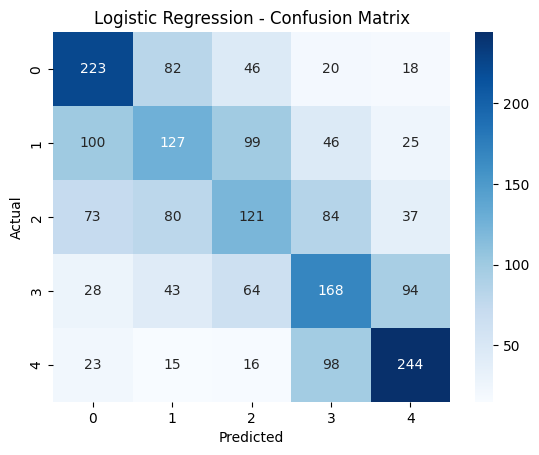

In [71]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain_vec, y_train)

# Predict
y_pred_lr = lr.predict(Xtest_vec)

# Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
rajas

NameError: name 'rajas' is not defined

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l1', 'l2'],               # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']        # Compatible solvers
}

# Create base model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_vec, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_lr = grid_search.best_estimator_

# Predict using best model
y_pred = best_lr.predict(Xtest_vec)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy after tuning:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Accuracy after tuning: 0.44984802431610943

📋 Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.61      0.55       389
         2.0       0.37      0.29      0.33       397
         3.0       0.35      0.29      0.32       395
         4.0       0.40      0.42      0.41       397
         5.0       0.57      0.64      0.61       396

    accuracy                           0.45      1974
   macro avg       0.44      0.45      0.44      1974
weighted avg       0.44      0.45      0.44      1974



C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('nb', MultinomialNB()),
    ('svc', LinearSVC(max_iter=1000)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    n_jobs=-1
)

stacking_clf.fit(Xtrain_vec, y_train)
y_pred_stack = stacking_clf.predict(Xtest_vec)

print("📈 Stacking with SVM + XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Report:\n", classification_report(y_test, y_pred_stack))

sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt="d", cmap="OrRd")
plt.title("Stacking (with XGB & SVM) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KeyboardInterrupt: 

 Logistic Regression:
Accuracy: 0.4473150962512665
Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.57      0.53       389
         2.0       0.37      0.32      0.34       397
         3.0       0.35      0.31      0.33       395
         4.0       0.40      0.42      0.41       397
         5.0       0.58      0.62      0.60       396

    accuracy                           0.45      1974
   macro avg       0.44      0.45      0.44      1974
weighted avg       0.44      0.45      0.44      1974



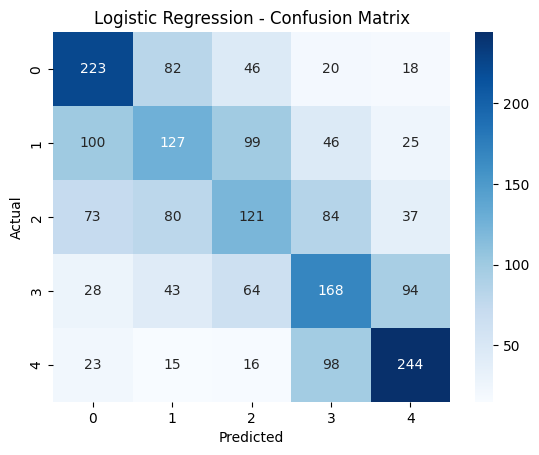

In [ ]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain_vec, y_train)

# Predict
y_pred_lr = lr.predict(Xtest_vec)

# Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
new_review = ["great dress"]

# Preprocess and vectorize the new review
new_vec = tv.transform(new_review)

# Predict
predicted_rating = lr.predict(new_vec)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.0


📌 Naive Bayes:


Accuracy: 0.4381965552178318
Classification Report:
               precision    recall  f1-score   support

         1.0       0.55      0.48      0.51       389
         2.0       0.35      0.29      0.32       397
         3.0       0.34      0.35      0.35       395
         4.0       0.37      0.51      0.43       397
         5.0       0.64      0.56      0.59       396

    accuracy                           0.44      1974
   macro avg       0.45      0.44      0.44      1974
weighted avg       0.45      0.44      0.44      1974



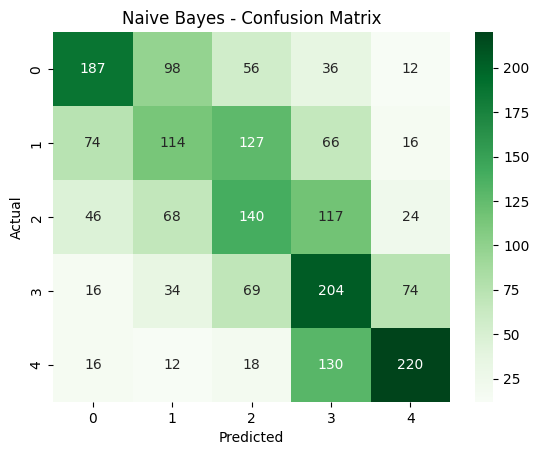

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(Xtrain_vec, y_train)

# Predict
y_pred_nb = nb.predict(Xtest_vec)

# Evaluation
print("📌 Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Greens")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📌 Support Vector Machine (SVM):
Accuracy: 0.4199594731509625
Classification Report:
               precision    recall  f1-score   support

         1.0       0.51      0.57      0.54       389
         2.0       0.34      0.30      0.32       397
         3.0       0.30      0.26      0.28       395
         4.0       0.36      0.38      0.37       397
         5.0       0.56      0.60      0.58       396

    accuracy                           0.42      1974
   macro avg       0.41      0.42      0.42      1974
weighted avg       0.41      0.42      0.41      1974



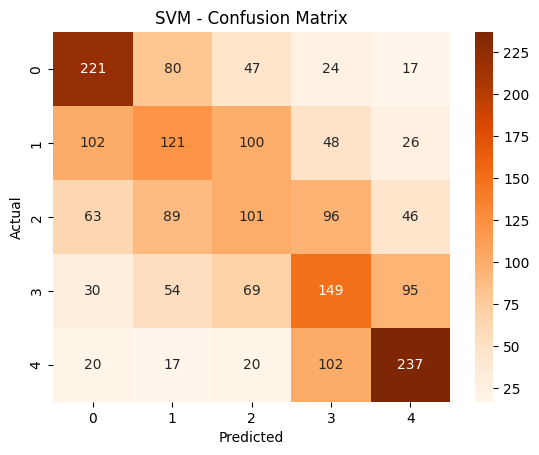

In [ ]:
from sklearn.svm import LinearSVC

# Train SVM
svm = LinearSVC()
svm.fit(Xtrain_vec, y_train)

# Predict
y_pred_svm = svm.predict(Xtest_vec)

# Evaluation
print("📌 Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Oranges")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🌳 Random Forest:
Accuracy: 0.42502532928064846
Classification Report:
               precision    recall  f1-score   support

         1.0       0.46      0.65      0.54       389
         2.0       0.35      0.23      0.28       397
         3.0       0.36      0.28      0.32       395
         4.0       0.37      0.37      0.37       397
         5.0       0.52      0.60      0.56       396

    accuracy                           0.43      1974
   macro avg       0.41      0.43      0.41      1974
weighted avg       0.41      0.43      0.41      1974



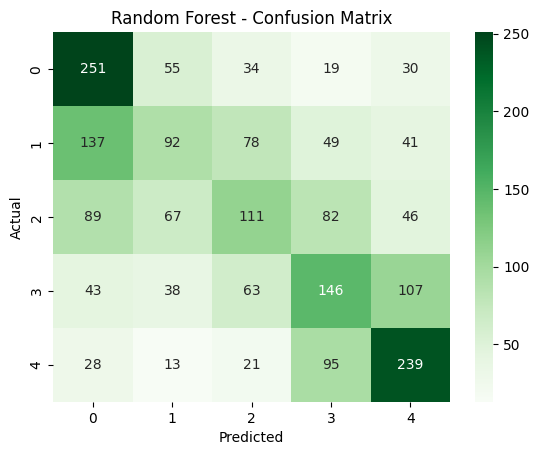

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrain_vec, y_train)

# Predict
y_pred_rf = rf.predict(Xtest_vec)

# Evaluation
print("🌳 Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:41:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost:
Accuracy: 0.4194528875379939
Classification Report:
               precision    recall  f1-score   support

         1.0       0.45      0.58      0.51       389
         2.0       0.33      0.29      0.31       397
         3.0       0.35      0.28      0.31       395
         4.0       0.39      0.38      0.38       397
         5.0       0.54      0.58      0.55       396

    accuracy                           0.42      1974
   macro avg       0.41      0.42      0.41      1974
weighted avg       0.41      0.42      0.41      1974



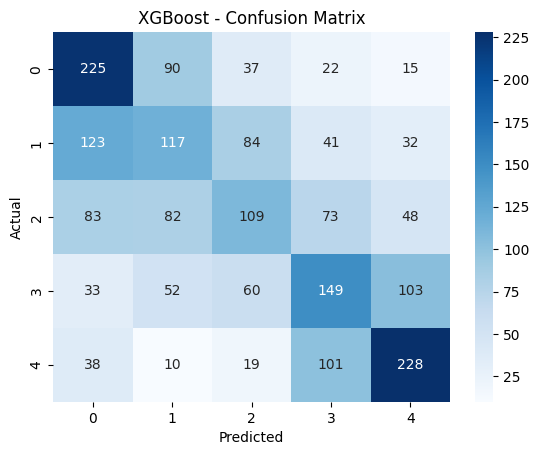

In [ ]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1
from xgboost import XGBClassifier

# Train XGBoost with corrected labels
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(Xtrain_vec, y_train_xgb)

# Predict
y_pred_xgb = xgb.predict(Xtest_vec)

# Since prediction is in 0–4 range, convert back to 1–5 for evaluation
y_pred_xgb = y_pred_xgb + 1

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("⚡ XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Best Alpha: 10.0
✅ Best Cross-Validation Accuracy: 0.4418949911320409
📈 Ridge Classifier (Best Alpha):
Accuracy on Test Set: 0.44984802431610943
Classification Report:
               precision    recall  f1-score   support

         1.0       0.48      0.65      0.55       389
         2.0       0.39      0.26      0.31       397
         3.0       0.37      0.27      0.31       395
         4.0       0.41      0.41      0.41       397
         5.0       0.53      0.67      0.59       396

    accuracy                           0.45      1974
   macro avg       0.43      0.45      0.43      1974
weighted avg       0.43      0.45      0.43      1974



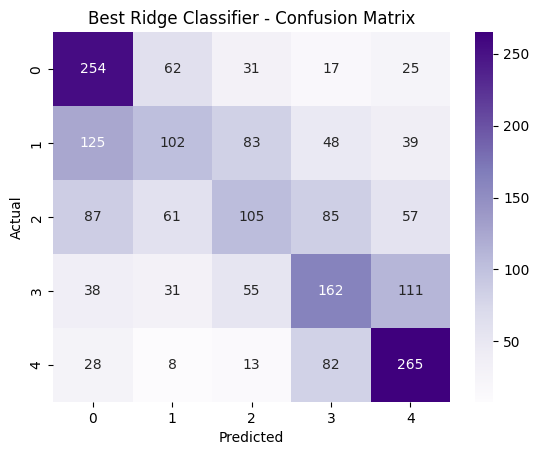

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for alpha
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Initialize RidgeClassifier
ridge = RidgeClassifier()

# Grid Search with 5-fold cross-validation
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(Xtrain_vec, y_train)

# Best estimator and best score
print("✅ Best Alpha:", grid.best_params_['alpha'])
print("✅ Best Cross-Validation Accuracy:", grid.best_score_)

# Use the best model to predict test set
best_ridge = grid.best_estimator_
y_pred_best = best_ridge.predict(Xtest_vec)

# Evaluation
print("📈 Ridge Classifier (Best Alpha):")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Purples")
plt.title("Best Ridge Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits
🎯 Best Parameters Found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
✅ Accuracy: 0.4402228976697062
📊 Classification Report:
               precision    recall  f1-score   support

         1.0       0.48      0.63      0.55       389
         2.0       0.38      0.25      0.30       397
         3.0       0.37      0.28      0.32       395
         4.0       0.40      0.42      0.41       397
         5.0       0.51      0.62      0.56       396

    accuracy                           0.44      1974
   macro avg       0.43      0.44      0.43      1974
weighted avg       0.43      0.44      0.43      1974



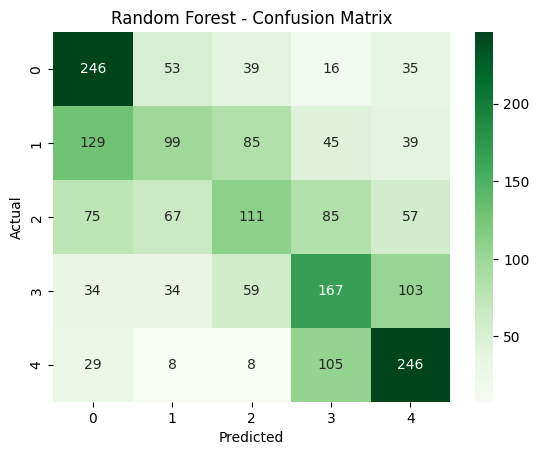

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit on training data
grid_search.fit(Xtrain_vec, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(Xtest_vec)

# Evaluation
print("🎯 Best Parameters Found:", grid_search.best_params_)
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pickle

# Save the model
with open('balance.pkl', 'wb') as f:
    pickle.dump(lr, f)
print("✅ Model saved using pickle.")

✅ Model saved using pickle.


In [ ]:
with open("vecbalance.pkl", "wb") as f:
    pickle.dump(tv, f)

In [ ]:
import pickle
# Load the model
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open("vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)


In [ ]:
# Transform new data using the loaded vectorizer
#X_train_vec_new = loaded_vectorizer.transform(X_train)
X_test_vec_new = loaded_vectorizer.transform(X_test)

# Predict using the loaded model
y_pred = loaded_model.predict(X_test_vec_new)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4199594731509625
              precision    recall  f1-score   support

         1.0       0.50      0.68      0.58       389
         2.0       0.48      0.03      0.05       397
         3.0       0.37      0.14      0.21       395
         4.0       0.30      0.70      0.42       397
         5.0       0.60      0.56      0.58       396

    accuracy                           0.42      1974
   macro avg       0.45      0.42      0.37      1974
weighted avg       0.45      0.42      0.37      1974

